## Imports and Functions
> For checking atomicity and making a non minimal nfa for a given nfa

By default, $\Sigma = \{a,b\}$

In [79]:
from fa import NFA,DFA
from visualize import AutomataVisualizer as vis

def check_atomicity(nfa: NFA):
    rev = nfa.reversal()
    dfa_rev = rev.toDFA()
    dfa_min = dfa_rev.minimal()
    before = len(dfa_rev.States)
    after  = len(dfa_min.States)
    print(f"Reversed-DFA states: {before}, min_dfa_states: {after}")
    print("=>", "atomic" if before == after else "non-atomic")
    return before == after


def make_nonminimal(nfa: NFA) -> NFA:
    suc = NFA()
    suc.setSigma(nfa.Sigma)
    orig_states = list(nfa.States)
    clone_states = [f"{q}'" for q in orig_states]

    for q in orig_states:
        suc.addState(q)
    for qp in clone_states:
        suc.addState(qp)
    initial_state = next(iter(nfa.Initial))
    suc.setInitial(initial_state)

    for f in nfa.Final:
        suc.addFinal(f)
        suc.addFinal(f + "'")

    def orig_targets(p, a):
        return nfa.delta.get(p, {}).get(a, set())

    for p in orig_states:
        for a in nfa.Sigma:
            for q in orig_targets(p, a):
                suc.addTransition(p, a, q)
                suc.addTransition(p, a, q + "'")

    for p, pp in zip(orig_states, clone_states):
        for a in nfa.Sigma:
            for q in orig_targets(p, a):
                suc.addTransition(pp, a, q + "'")

    return suc

def make_atomic_by_reverse_min(nfa: NFA) -> NFA:
    dfa_min:DFA = nfa.toDFA().minimal()
    atomic_nfa: NFA = dfa_min.reversal()
    return atomic_nfa


## Language = $\Sigma^*ab\Sigma^*$

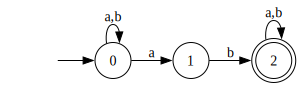

In [80]:

nfa = NFA()
nfa.setSigma({'a', 'b'})
for s in [str(i) for i in range(3)]:
    nfa.addState(s)
nfa.setInitial('0')
nfa.addFinal('2')
nfa.addTransition('0', 'a', '0')
nfa.addTransition('0', 'b', '0')
nfa.addTransition('0', 'a', '1')
nfa.addTransition('1', 'b', '2')
nfa.addTransition('2', 'a', '2')
nfa.addTransition('2', 'b', '2')

vis.to_graphviz(nfa)

### Atomicity of the NFA

In [81]:
check_atomicity(nfa)
print('-')

Reversed-DFA states: 4, min_dfa_states: 3
=> non-atomic
-


### Converting this NFA to DFA, minimising it, casting it as NFA and checking the atomicity. 

Since this will be the canonical DFA, it is supposed to be atomic

Reversed-DFA states: 3, min_dfa_states: 3
=> atomic


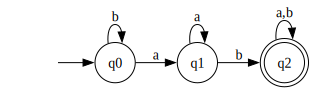

In [82]:
canonical_dfa:NFA = nfa.toDFA().minimal().toNFA()
check_atomicity(canonical_dfa)
vis.to_graphviz(canonical_dfa)

### Converting the NFA to an atomic NFA by the process of:

Let $N$ be any NFA for $L$.

Then, $N^{RDMR}$ is a atomic NFA for $L$

Reversed-DFA states: 3, min_dfa_states: 3
=> atomic


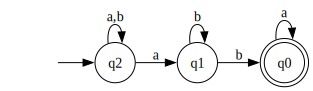

In [83]:
atomic_nfa = make_atomic_by_reverse_min(nfa.reversal())
check_atomicity(atomic_nfa)
vis.to_graphviz(atomic_nfa)

### Converting a atomic NFA to a Non-Atomic NFA

As Theorem 3 of section 3 states in [https://arxiv.org/pdf/1301.5585](https://arxiv.org/pdf/1301.5585),

<b>Theorem 3: </b><i>A trim NFA $N$ is atomic if and only if $N^{RD}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is atomic if and only if $N^{D}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is non atomic if and only if $N^{D}$ is
non minimal.</i>

So, If we have a non minimal DFA $N^{D}$ for $L^{R}$, then the NFA $N^{DR}$ is non atomic for $L$.

So we start with a DFA which accepts $L^{R}$, then we cast it as NFA and, make it non-minimal, and then reverse, we will have a non atomic NFA for $L$

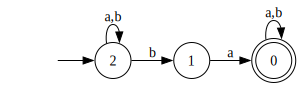

In [84]:
nfa_for_L_R = nfa.reversal()
vis.to_graphviz(nfa_for_L_R)

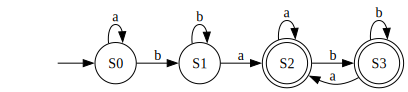

In [85]:
dfa_for_L_R = nfa_for_L_R.toDFA()
vis.to_graphviz(dfa_for_L_R)

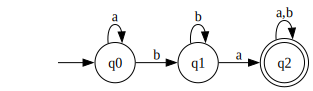

In [86]:
minimal_dfa_for_L_R = dfa_for_L_R.minimal() # Just for visualization, not really needed
vis.to_graphviz(minimal_dfa_for_L_R)

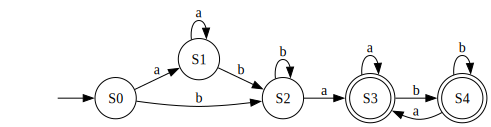

In [87]:
non_minimal_dfa_for_L_R = make_nonminimal(dfa_for_L_R.toNFA()).toDFA()
vis.to_graphviz(non_minimal_dfa_for_L_R)

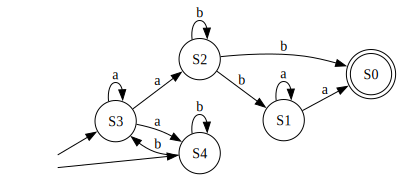

In [88]:
non_atomic_nfa_for_L = non_minimal_dfa_for_L_R.reversal()
vis.to_graphviz(non_atomic_nfa_for_L)

### Check if the non atomic NFA, atomic NFA are equivalent to the original NFA ?

In [89]:
print(atomic_nfa.is_equivalent_to(nfa))
print(non_atomic_nfa_for_L.is_equivalent_to(nfa))

True
True


## Language = $\Sigma^*aba\Sigma^*$

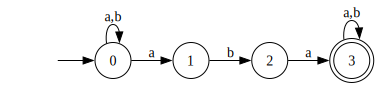

In [90]:

nfa = NFA()
nfa.setSigma({'a', 'b'})
for s in [str(i) for i in range(4)]:
    nfa.addState(s)
nfa.setInitial('0')
nfa.addFinal('3')
nfa.addTransition('0', 'a', '0')
nfa.addTransition('0', 'b', '0')
nfa.addTransition('0', 'a', '1')
nfa.addTransition('1', 'b', '2')
nfa.addTransition('2', 'a', '3')
nfa.addTransition('3', 'a', '3')
nfa.addTransition('3', 'b', '3')

vis.to_graphviz(nfa)

### Atomicity of the NFA

In [91]:
check_atomicity(nfa)
print('-')

Reversed-DFA states: 6, min_dfa_states: 4
=> non-atomic
-


### Converting this NFA to DFA, minimising it, casting it as NFA and checking the atomicity. 

Since this will be the canonical DFA, it is supposed to be atomic

Reversed-DFA states: 4, min_dfa_states: 4
=> atomic


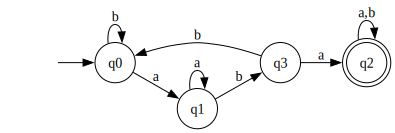

In [92]:
canonical_dfa:NFA = nfa.toDFA().minimal().toNFA()
check_atomicity(canonical_dfa)
vis.to_graphviz(canonical_dfa)

### Converting the NFA to an atomic NFA by the process of:

Let $N$ be any NFA for $L$.

Then, $N^{RDMR}$ is a atomic NFA for $L$

Reversed-DFA states: 4, min_dfa_states: 4
=> atomic


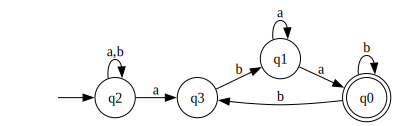

In [93]:
atomic_nfa = make_atomic_by_reverse_min(nfa.reversal())
check_atomicity(atomic_nfa)
vis.to_graphviz(atomic_nfa)

### Converting a atomic NFA to a Non-Atomic NFA

As Theorem 3 of section 3 states in [https://arxiv.org/pdf/1301.5585](https://arxiv.org/pdf/1301.5585),

<b>Theorem 3: </b><i>A trim NFA $N$ is atomic if and only if $N^{RD}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is atomic if and only if $N^{D}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is non atomic if and only if $N^{D}$ is
non minimal.</i>

So, If we have a non minimal DFA $N^{D}$ for $L^{R}$, then the NFA $N^{DR}$ is non atomic for $L$.

So we start with a DFA which accepts $L^{R}$, then we cast it as NFA and, make it non-minimal, and then reverse, we will have a non atomic NFA for $L$

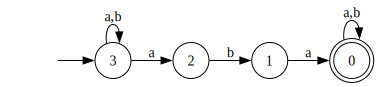

In [94]:
nfa_for_L_R = nfa.reversal()
vis.to_graphviz(nfa_for_L_R)

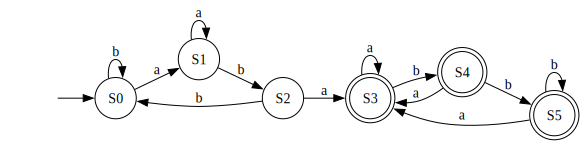

In [95]:
dfa_for_L_R = nfa_for_L_R.toDFA()
vis.to_graphviz(dfa_for_L_R)

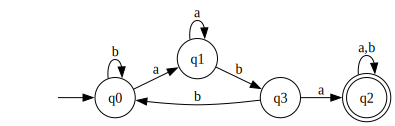

In [96]:
minimal_dfa_for_L_R = dfa_for_L_R.minimal() # Just for visualization, not really needed
vis.to_graphviz(minimal_dfa_for_L_R)

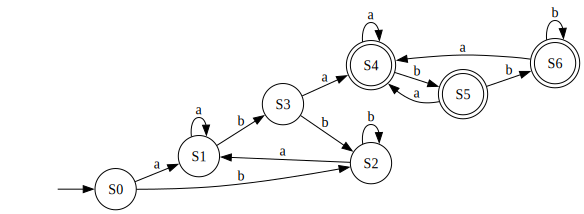

In [97]:
non_minimal_dfa_for_L_R = make_nonminimal(dfa_for_L_R.toNFA()).toDFA()
vis.to_graphviz(non_minimal_dfa_for_L_R)

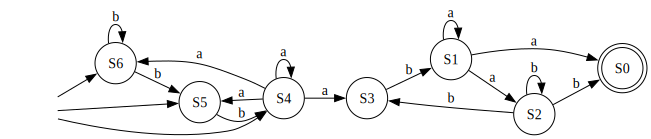

In [98]:
non_atomic_nfa_for_L = non_minimal_dfa_for_L_R.reversal()
vis.to_graphviz(non_atomic_nfa_for_L)

### Check if the non atomic NFA, atomic NFA are equivalent to the original NFA ?

In [99]:
print(atomic_nfa.is_equivalent_to(nfa))
print(non_atomic_nfa_for_L.is_equivalent_to(nfa))

True
True


## Language = $\Sigma^*abc\Sigma^*$

### $\Sigma = \{a,b,c\}$

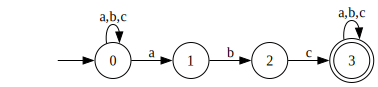

In [100]:

nfa = NFA()
nfa.setSigma({'a', 'b','c'})
for s in [str(i) for i in range(4)]:
    nfa.addState(s)
nfa.setInitial('0')
nfa.addFinal('3')
nfa.addTransition('0', 'a', '0')
nfa.addTransition('0', 'b', '0')
nfa.addTransition('0', 'c', '0')
nfa.addTransition('0', 'a', '1')
nfa.addTransition('1', 'b', '2')
nfa.addTransition('2', 'c', '3')
nfa.addTransition('3', 'a', '3')
nfa.addTransition('3', 'b', '3')
nfa.addTransition('3', 'c', '3')

vis.to_graphviz(nfa)

### Atomicity of the NFA

In [101]:
check_atomicity(nfa)
print('-')

Reversed-DFA states: 6, min_dfa_states: 4
=> non-atomic
-


### Converting this NFA to DFA, minimising it, casting it as NFA and checking the atomicity. 

Since this will be the canonical DFA, it is supposed to be atomic

Reversed-DFA states: 4, min_dfa_states: 4
=> atomic


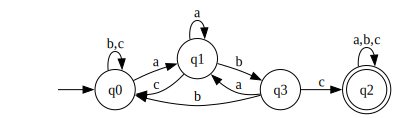

In [102]:
canonical_dfa:NFA = nfa.toDFA().minimal().toNFA()
check_atomicity(canonical_dfa)
vis.to_graphviz(canonical_dfa)

### Converting the NFA to an atomic NFA by the process of:

Let $N$ be any NFA for $L$.

Then, $N^{RDMR}$ is a atomic NFA for $L$

Reversed-DFA states: 4, min_dfa_states: 4
=> atomic


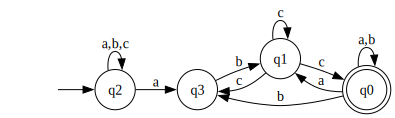

In [103]:
atomic_nfa = make_atomic_by_reverse_min(nfa.reversal())
check_atomicity(atomic_nfa)
vis.to_graphviz(atomic_nfa)

### Converting a atomic NFA to a Non-Atomic NFA

As Theorem 3 of section 3 states in [https://arxiv.org/pdf/1301.5585](https://arxiv.org/pdf/1301.5585),

<b>Theorem 3: </b><i>A trim NFA $N$ is atomic if and only if $N^{RD}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is atomic if and only if $N^{D}$ is
minimal.</i>

So, <i>A NFA $N^{R}$ is non atomic if and only if $N^{D}$ is
non minimal.</i>

So, If we have a non minimal DFA $N^{D}$ for $L^{R}$, then the NFA $N^{DR}$ is non atomic for $L$.

So we start with a DFA which accepts $L^{R}$, then we cast it as NFA and, make it non-minimal, and then reverse, we will have a non atomic NFA for $L$

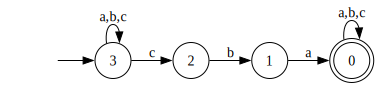

In [104]:
nfa_for_L_R = nfa.reversal()
vis.to_graphviz(nfa_for_L_R)

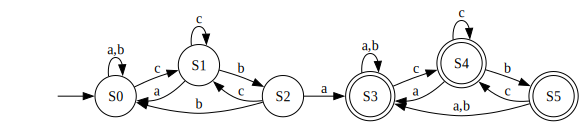

In [105]:
dfa_for_L_R = nfa_for_L_R.toDFA()
vis.to_graphviz(dfa_for_L_R)

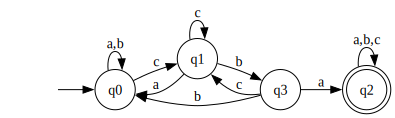

In [106]:
minimal_dfa_for_L_R = dfa_for_L_R.minimal() # Just for visualization, not really needed
vis.to_graphviz(minimal_dfa_for_L_R)

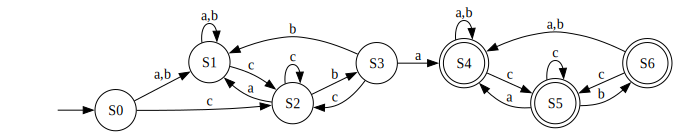

In [107]:
non_minimal_dfa_for_L_R = make_nonminimal(dfa_for_L_R.toNFA()).toDFA()
vis.to_graphviz(non_minimal_dfa_for_L_R)

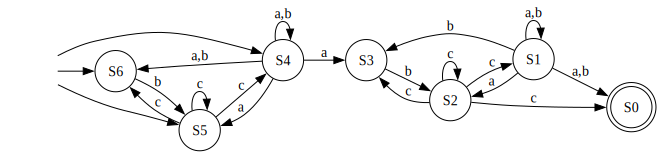

In [108]:
non_atomic_nfa_for_L = non_minimal_dfa_for_L_R.reversal()
vis.to_graphviz(non_atomic_nfa_for_L)

### Check if the non atomic NFA, atomic NFA are equivalent to the original NFA ?

In [109]:
print(atomic_nfa.is_equivalent_to(nfa))
print(non_atomic_nfa_for_L.is_equivalent_to(nfa))

True
True
